# Communications Project Overview

This section to be updated consistently as we evolve the project.

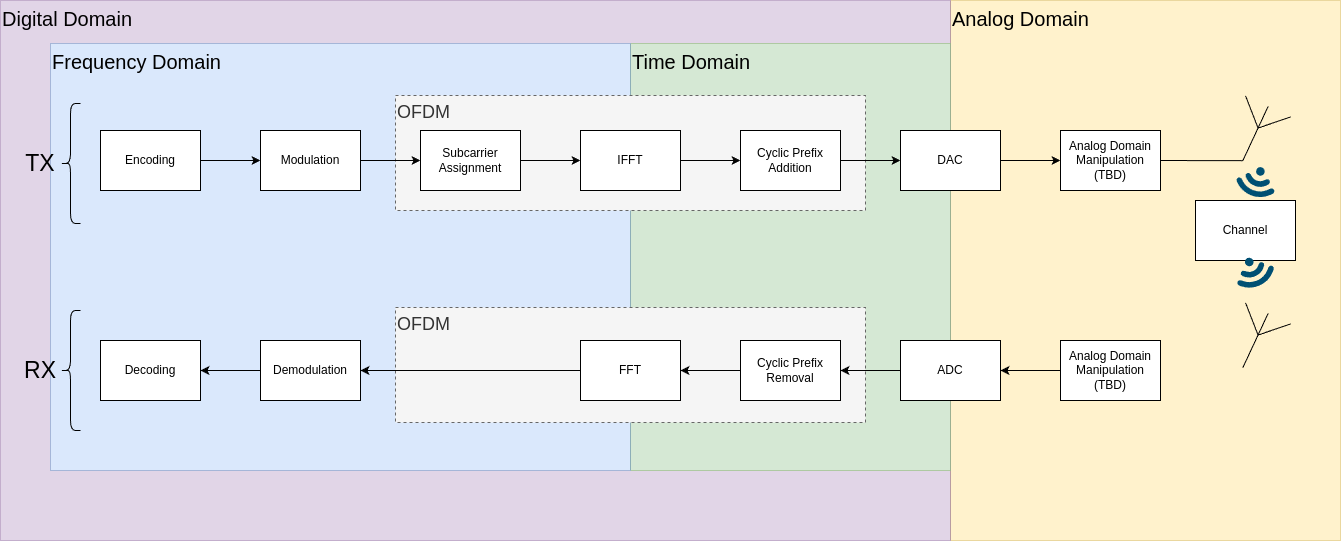

This project aims to encompass a full communications scheme, including all components that can be implemented in a software framework. This includes, but not limited to, the following submodules:

* Encoding/Decoding
* Modulation/Demodulation
* OFDM TX/RX
* Digital and Analog Domain Calculations
* Channel modeling

and more to be implemented.

## Coding

Coding is one of the most crucial and algorithm-intensive steps in the project. It ensures reliable communication through error detection and correction. The current implementation includes:

* Polar Codes for coding, chosen for their capacity-achieving performance.
* Successive Cancellation Decoding (SCD) on the receiver side, leveraging its simplicity for initial implementation.

For the Minimum Viable Product (MVP), the following features are targeted:

Control Channel Protocol (5G):

* Extensive interleaving schemes,
* Cyclic Redundancy Check (CRC),
* Parity checks for error detection,
* CA-SCL Decoding (CRC-Aided Successive Cancellation List Decoding) for improved performance.

Data Channel Protocol (5G):

* LDPC Decoding for its excellent performance with long block lengths,
* Additional elements necessary for compliance with the 5G standard.

## Modulation

Modulation maps a sequence of bits to constellation symbols, allowing efficient transmission of data over a communication channel. Current modulation schemes in use include:

* BPSK (1 bit/symbol, robust but low spectral efficiency),
* QPSK (2 bits/symbol, a balance between robustness and efficiency),
* 16QAM (4 bits/symbol, higher efficiency but requires better SNR).

Planned for future implementation:

* 64QAM (6 bits/symbol, highly efficient but sensitive to noise).

### Demodulation and LLRs
During demodulation, Log-Likelihood Ratios (LLRs) are computed to quantify confidence in the received bits. Exact LLR computation poses two challenges:

* It is computationally intensive, especially for higher-order modulation.
* It is numerically unstable, particularly in low SNR scenarios due to operations like logarithms or divisions by small values.

To address these issues, approximations are employed. Common approaches include max-log approximation or clipping to avoid numerical instability. It's important to note that some of these techniques may be patented, so caution is advised during implementation.

Higher-order modulation schemes like 64QAM will demand more precise and efficient LLR computations to balance the trade-off between spectral efficiency and robustness.

## OFDM

In OFDM, modulated symbols are mapped to subcarriers in the frequency domain, where certain subcarriers may serve as pilots or guard bands. The mapped symbols are then transformed from the frequency domain to the time domain using an IFFT. To combat multi-path fading, a cyclic prefix (CP) is prepended to the time-domain signals. The CP length is typically chosen based on the channel's maximum expected delay spread.

The number of subcarriers and CP length are determined by the communication standard. While we are currently focusing on a single-user scenario, practical OFDM systems often involve multi-user resource sharing, such as Orthogonal Frequency Division Multiple Access (OFDMA). Multi-user scenarios would require a MAC layer implementation and a more sophisticated simulation framework, which is beyond our current scope.

A key consideration during OFDM is preserving signal power across transformations. For example, when using np.fft.ifft, the resulting time-domain signal must be scaled by the number of subcarriers, to maintain power consistency.

Future extensions could address channel estimation, pilot allocation, and modeling dynamic multi-path channels to approach realistic scenarios, even in a single-user context.